In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Point:
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y
        self.next = None
        self.prev = None

    def __repr__(self):
        return "X:" + str(self.x) + " Y:" + str(self.y) + " Next:" + str(self.next) + " Prev:" + str(self.prev)
    
    def toList(self):
        return [self.x, self.y]

In [3]:
class Edge:
    def __init__(self, A = Point(), B = Point):
        self.A = A
        self.B = B
        self.conflict = list()
    
    def __repr__(self):
        return "A:" + str(self.A) + "\nB:" + str(self.B) + "\nList:" + str(self.conflict)

In [4]:
def distance(a, b):
    return np.sqrt(np.square(b.x - a.x) + np.square(b.y - a.y))

In [5]:
def centerTriangle(a, b, c):
    centerX = (a.x + b.x + c.x) / 3;
    centerY = (a.y + b.y + c.y) / 3;
    return Point(centerX, centerY)

In [6]:
def lineIntersection(line1, line2):
    def line(p1, p2):
        A = (p1[1] - p2[1])
        B = (p2[0] - p1[0])
        C = (p1[0]*p2[1] - p2[0]*p1[1])
        return A, B, -C
    
    L1 = line(line1.A.toList(), line1.B.toList())
    L2 = line(line2.A.toList(), line2.B.toList())
    
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        return Point(x,y)
    else:
        return False

In [28]:
def findEdge(point, edges, center):
    centerLine = Edge(point, center)
    minDistance = 1000
    minEdge = None
    for edge in edges:
        result = lineIntersection(edge, centerLine)
        if result != False:
            dist = distance(result, point)
            if dist <  minDistance:
                minDistance = dist
                minEdge = edge
    return minEdge

In [51]:
def pointInTriangle(point, A, B, C):
    v0 = C.toList() - A.toList()
    v1 = B.toList() - A.toList()
    v2 = point.toList() - A.toList()
    
    dot00 = np.dot(v0, v0)
    dot01 = np.dot(v0, v1)
    dot02 = np.dot(v0, v2)
    dot11 = np.dot(v1, v1)
    dot12 = np.dot(v1, v2)
    
    invDenom = 1 / (dot00 * dot11 - dot01 * dot01)
    u = (dot11 * dot02 - dot01 * dot12) * invDenom
    v = (dot00 * dot12 - dot01 * dot02) * invDenom
    
    return (u >= 0) and (v >= 0) and (u + v < 1)

In [8]:
def isLeftTurn(a,b,c):
    return (b[0] - a[0]) * (c[1] - a[1]) - (b[1] - a[1]) * (c[0] - a[0]) > 0

In [9]:
def sortXIndex(pts):    
    return np.argsort(pts[:,0])

In [10]:
def sweepHull(pts):
    lst = [ Point(pts[i][0],pts[i][1]) for i in sortXIndex(pts) ] # nach X aufs. sortierte Liste mit SweepPoint Objeketen
    lst[0].next = 1
    lst[0].prev = 1
    
    lst[1].next = 0
    lst[1].prev = 0 # Startbedingung, Zweipunktkonvexhülle
    
    for i in range(2, len(lst)):
        if lst[i].y < lst[i-1].y:
            lst[i].next = i-1
            lst[i].prev = lst[i-1].prev
        else:
            lst[i].prev = i-1
            lst[i].next = lst[i-1].next
        
        lst[lst[i].prev].next = i
        lst[lst[i].next].prev = i
        
        while isLeftTurn(lst[i].toList(), lst[lst[i].prev].toList(), lst[lst[lst[i].prev].prev].toList()):
            lst[lst[lst[i].prev].prev].next = i
            lst[i].prev = lst[lst[i].prev].prev
            
        while isLeftTurn(lst[lst[lst[i].next].next].toList(), lst[lst[i].next].toList(), lst[i].toList()):
            lst[lst[lst[i].next].next].prev = i
            lst[i].next = lst[lst[i].next].next

    out = [lst[0]]
    while out[len(out) - 1].next != 0:
        out.append(lst[out[len(out) - 1].next])
    out.append(lst[out[len(out) - 1].next])
    return [i.toList() for i in out]    

In [52]:
pts = np.random.uniform(low=-4,high=4, size=(20,2))
hull = np.array(sweepHull(pts))

In [53]:
pts = np.append(pts, [[5,0]], axis=0)

In [54]:
pts = [ Point(i[0], i[1]) for i in pts]

In [55]:
center = centerTriangle(pts[0], pts[1], pts[2])

In [56]:
edges = [ Edge( Point(hull[i][0], hull[i][1]) , Point(hull[i+1][0], hull[i+1][1])) for i in range(len(hull)-1) ]

edge1 = findEdge(pts[5], edges, center)


print(pointInTriangle(Point(),))

A:X:0.692423551091 Y:-3.928587923 Next:None Prev:None
B:X:3.76256147718 Y:-2.79504732465 Next:None Prev:None
List:[]


AttributeError: 'Edge' object has no attribute 'toList'

In [48]:
pts = np.array([ i.toList() for i in pts ])

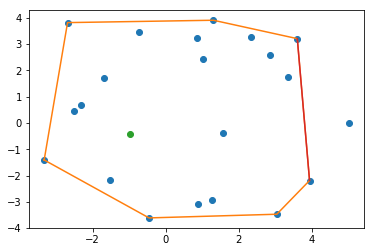

In [49]:
plt.plot(pts[:,0], pts[:,1], 'o')
plt.plot(hull[:,0], hull[:,1])
plt.plot(center.x, center.y, 'o')
plt.plot([edge1.A.x, edge1.B.x], [edge1.A.y, edge1.B.y])

plt.show()